# Model Comparison

To compare models, we will first optimize the parameters of two diffrent models and look at how the different parameters settings impact the model comparison.  Later, we'll see how to compare across models of different classes.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn import cluster
from sklearn import svm
from sklearn import tree
# import the whole model selection module
from sklearn import model_selection
sns.set_theme(palette='colorblind')

We'll use the iris data again.

In [2]:
iris_X, iris_y = datasets.load_iris(return_X_y=True)

Remember, we need to split the data into training and test.  The cross validation step will hep us optimize the parameters, but we don't want *data leakage* where the model has seen the test data multiple times. So, we split the data here for train and test annd the cross validation splits the training data into train and "test" again, but this test is better termed validation.

In [3]:
iris_X_train, iris_X_test, iris_y_train, iris_y_test = model_selection.train_test_split(
    iris_X,iris_y, test_size =.2)

Then we can make the object, the parameter grid dictionary and the Grid Search object.  We split these into separate cells, so that we can use the built in help to see more detail.

In [4]:
dt = tree.DecisionTreeClassifier()

In [5]:
params_dt = {'criterion':['gini','entropy'],
             'max_depth':[2,3,4],
       'min_samples_leaf':list(range(2,20,2))}

In [6]:
dt_opt = model_selection.GridSearchCV(dt,params_dt)

Then we fit the Grid search using the training data, and remember this actually resets the parameters and then cross validates multiple times.

In [7]:
dt_opt.fit(iris_X_train,iris_y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4],
                         'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]})

adn look at the results

In [8]:
dt_opt.cv_results_

{'mean_fit_time': array([0.00068922, 0.0004539 , 0.00044861, 0.000453  , 0.00045519,
        0.00045438, 0.00044761, 0.00044813, 0.0004488 , 0.00046687,
        0.00046892, 0.00046191, 0.00045643, 0.00045676, 0.0004662 ,
        0.00046501, 0.00045619, 0.00045352, 0.00046659, 0.00046344,
        0.00046654, 0.00048079, 0.00045781, 0.00046291, 0.00046129,
        0.00045433, 0.00044847, 0.00046334, 0.00046215, 0.00046062,
        0.00045633, 0.00045495, 0.00045671, 0.00047312, 0.00046153,
        0.0004518 , 0.00047145, 0.00048375, 0.00046844, 0.00046301,
        0.00046873, 0.00046792, 0.00046515, 0.00048509, 0.00046129,
        0.00048213, 0.00047164, 0.00047073, 0.00047102, 0.00046906,
        0.00046978, 0.00046201, 0.00045738, 0.00046301]),
 'std_fit_time': array([4.30508340e-04, 8.34451403e-06, 2.03202016e-06, 9.27935401e-06,
        9.75758438e-06, 1.15187514e-05, 2.91456352e-06, 2.93400193e-06,
        2.42484706e-06, 1.20870460e-05, 1.80200289e-05, 3.46683898e-06,
        5.529

We can reformat it into a dataframe for further analysis.

In [9]:
dt_df = pd.DataFrame(dt_opt.cv_results_)
dt_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000689,0.000431,0.000262,0.000067,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.958333,0.958333,0.916667,0.958333,0.933333,0.033333,41
1,0.000454,0.000008,0.000231,0.000007,gini,2,4,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.875,0.958333,1.000000,0.916667,0.958333,0.941667,0.042492,7


```{admonition} Correction
The parameters in this function were in the wrong 
order in this function in class
```
I changed the markers and the color of the error bars for readability.

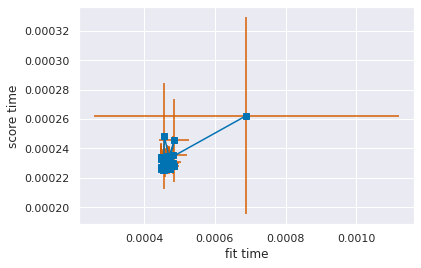

In [10]:
plt.errorbar(x=dt_df['mean_fit_time'],y=dt_df['mean_score_time'],
     xerr=dt_df['std_fit_time'],yerr=dt_df['std_score_time'],
             marker='s',ecolor='r')
plt.xlabel('fit time')
plt.ylabel('score time')
# save the limits so we can reuse them
xmin, xmax, ymin, ymax = plt.axis()

The "points" are at the mean fit and score times. The lines are the "standard deviation" or how much we expect that number to vary, since means are an estimate. 
Because the data shows an upward trend, this plot tells us that mostly, the models that are slower to fit are also slower to apply. This makes sense for decision trees, deeper trees take longer to learn and longer to traverse when predicting. 
Because the error bars mostly overlap the other points, this tells us that mostly the variation in time is not a reliable difference. If we re-ran the GridSearch, we could get them in different orders. 

To interpret the error bar plot, let's look at a line plot of just the means, with the same limits so that it's easier to compare to the plot above.

(0.00021566125474244968, 0.0011627796021911442)

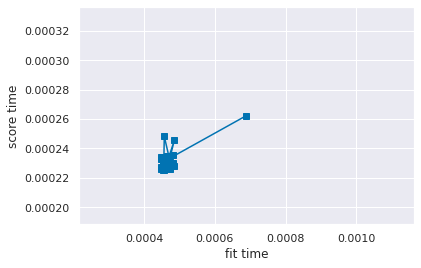

In [11]:
plt.plot(dt_df['mean_fit_time'],
            dt_df['mean_score_time'], marker='s')
plt.xlabel('fit time')
plt.ylabel('score time')
# match the axis limits to above
plt.ylim(ymin, ymax)
plt.xlim(xmin,xmax)

this plot shows the mean times, without the error bars.

<AxesSubplot:>

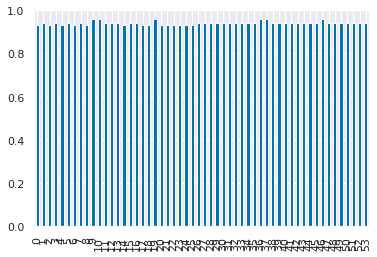

In [12]:
dt_df['mean_test_score'].plot(kind='bar')

In [13]:
dt_df['mean_test_score']

0     0.933333
1     0.941667
2     0.933333
3     0.941667
4     0.933333
5     0.941667
6     0.933333
7     0.941667
8     0.933333
9     0.958333
10    0.958333
11    0.941667
12    0.941667
13    0.941667
14    0.933333
15    0.941667
16    0.941667
17    0.933333
18    0.933333
19    0.958333
20    0.933333
21    0.933333
22    0.933333
23    0.933333
24    0.933333
25    0.933333
26    0.941667
27    0.941667
28    0.941667
29    0.941667
30    0.941667
31    0.941667
32    0.941667
33    0.941667
34    0.941667
35    0.941667
36    0.958333
37    0.958333
38    0.941667
39    0.941667
40    0.941667
41    0.941667
42    0.941667
43    0.941667
44    0.941667
45    0.941667
46    0.958333
47    0.941667
48    0.941667
49    0.941667
50    0.941667
51    0.941667
52    0.941667
53    0.941667
Name: mean_test_score, dtype: float64

Now let's compare with a different model, we'll use the parameter optimized version for that model.

In [14]:
svm_clf = svm.SVC()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, 1, 10]}
svm_opt = GridSearchCV(svm_clf,param_grid,)

NameError: name 'GridSearchCV' is not defined

The error above is because we didn't import `GridSearchCV` directly today, we imported the whole `model_selection` module, so we have to use that in order to access the class.

In [15]:
svm_clf = svm.SVC()
param_grid = {'kernel':['linear','rbf'], 'C':[.5, .75,1,2,5,7, 10]}
svm_opt = model_selection.GridSearchCV(svm_clf,param_grid,cv=10)

In [16]:
type(model_selection)

module

In [17]:
dt_opt.__dict__

{'scoring': None,
 'estimator': DecisionTreeClassifier(),
 'n_jobs': None,
 'refit': True,
 'cv': None,
 'verbose': 0,
 'pre_dispatch': '2*n_jobs',
 'error_score': nan,
 'return_train_score': False,
 'param_grid': {'criterion': ['gini', 'entropy'],
  'max_depth': [2, 3, 4],
  'min_samples_leaf': [2, 4, 6, 8, 10, 12, 14, 16, 18]},
 'multimetric_': False,
 'best_index_': 9,
 'best_score_': 0.9583333333333334,
 'best_params_': {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2},
 'best_estimator_': DecisionTreeClassifier(max_depth=3, min_samples_leaf=2),
 'refit_time_': 0.000347137451171875,
 'scorer_': <function sklearn.metrics._scorer._passthrough_scorer(estimator, *args, **kwargs)>,
 'cv_results_': {'mean_fit_time': array([0.00068922, 0.0004539 , 0.00044861, 0.000453  , 0.00045519,
         0.00045438, 0.00044761, 0.00044813, 0.0004488 , 0.00046687,
         0.00046892, 0.00046191, 0.00045643, 0.00045676, 0.0004662 ,
         0.00046501, 0.00045619, 0.00045352, 0.00046659, 0.0

This doesn't have attributes yet, even though they are the same type, because we have not fit it tot data yet.

In [18]:
type(svm_opt), type(dt_opt)

(sklearn.model_selection._search.GridSearchCV,
 sklearn.model_selection._search.GridSearchCV)

Now we can fit the model to the training data of this second model.

In [19]:
# fit the model and  put the CV results in a dataframe
svm_opt.fit(iris_X_train,iris_y_train)
sv_df = pd.DataFrame(svm_opt.cv_results_)

In [20]:
sv_df.head(2)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000631,0.000076,0.00029,0.000019,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",1.000000,1.0,0.916667,1.0,1.0,1.0,0.916667,1.0,1.0,0.916667,0.975000,0.038188,7
1,0.000724,0.000021,0.00032,0.000021,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",0.833333,1.0,0.916667,1.0,1.0,1.0,1.000000,1.0,1.0,0.916667,0.966667,0.055277,9


<ErrorbarContainer object of 3 artists>

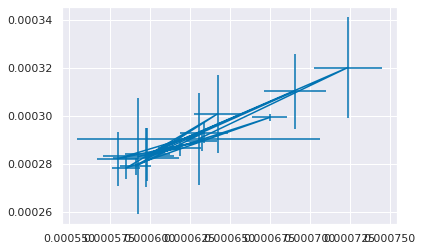

In [21]:
plt.errorbar(x=sv_df['mean_fit_time'],xerr=sv_df['std_fit_time'],
            y=sv_df['mean_score_time'],yerr=sv_df['std_score_time'])

In [22]:
sv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_C', 'param_kernel', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'split5_test_score', 'split6_test_score',
       'split7_test_score', 'split8_test_score', 'split9_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

We can see if the models that take longer to fit or score perform better.

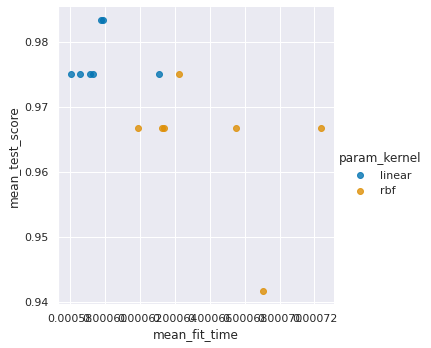

In [23]:
svm_time = sv_df.melt(id_vars=['param_C', 'param_kernel', 'params',],
                      value_vars=['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time'])
sns.lmplot(data=sv_df, x='mean_fit_time',y='mean_test_score',
          hue='param_kernel',fit_reg=False)

This looks like mostly no.

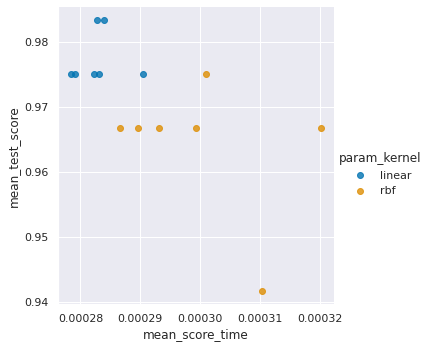

In [24]:
sns.lmplot(data=sv_df, x='mean_score_time',y='mean_test_score',
          hue='param_kernel',fit_reg=False)

Again, for score time, the slower models don't appear to be better.  Remember though the time differences weren't that different. 

```{admonition} Try it yourself
Try this same analysis for the decision tree, does it matter there?
```

In [25]:
sv_df_scores = sv_df.melt(id_vars=['param_C', 'param_kernel', 'params',],
                    value_vars=['split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score'], value_name='score')
sv_df_scores.head()

,param_C,param_kernel,params,variable,score
0,0.5,linear,"{'C': 0.5, 'kernel': 'linear'}",split0_test_score,1.000000
1,0.5,rbf,"{'C': 0.5, 'kernel': 'rbf'}",split0_test_score,0.833333
2,0.75,linear,"{'C': 0.75, 'kernel': 'linear'}",split0_test_score,1.000000
3,0.75,rbf,"{'C': 0.75, 'kernel': 'rbf'}",split0_test_score,0.833333
4,1,linear,"{'C': 1, 'kernel': 'linear'}",split0_test_score,1.000000


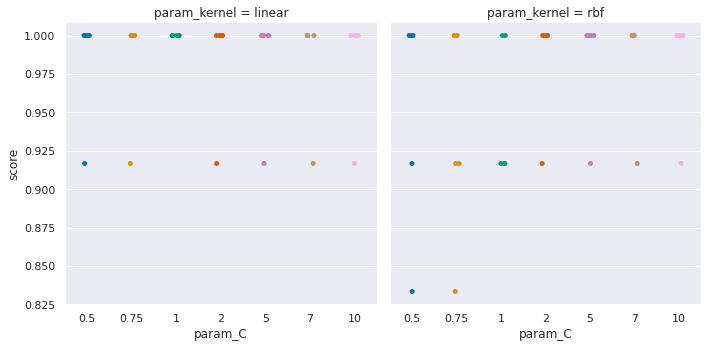

In [26]:
sns.catplot(data=sv_df_scores,x='param_C',y='score',
            col='param_kernel')

```{admonition} Try it yourself
Try interpretting the plot above, what does it say? what can you conclude from it. 
```

<AxesSubplot:>

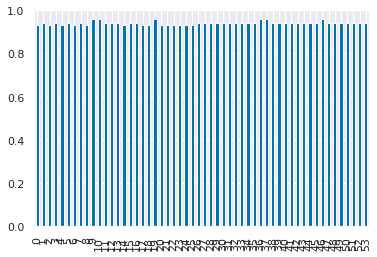

In [27]:
dt_df['mean_test_score'].plot(kind='bar')

<AxesSubplot:>

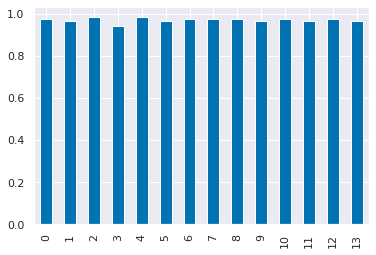

In [28]:
sv_df['mean_test_score'].plot(kind='bar')

From these last two plots we see that the SVM performance is more sensitive to its parameters, where for the parameters tested, the decision tree is not impacted. 

What can we say based on this?  We'll pick up from here on Wednesday.